In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Bonds
output_bonds = pd.read_csv("bonds.csv")

# 2. Gold
output_gold = pd.read_csv("gold.csv")

# 3. S&P 500
output_sp500 = pd.read_csv("sp500.csv")

In [3]:
def preprocess_to_daily(df, date_col, value_col):

    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

    df = df.dropna(subset=[date_col, value_col])

    df = df.set_index(date_col)

    full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

    df_daily = df.reindex(full_date_range)

    df_daily.index.name = date_col

    df_daily[value_col] = df_daily[value_col].fillna(method='bfill')

    df_daily = df_daily.reset_index()
    df_daily[date_col] = df_daily[date_col].dt.strftime('%Y-%m-%d')
    
    return df_daily

In [4]:
# 1. Bonds
output_bonds_daily = preprocess_to_daily(output_bonds, 'DateTime', 'Total Return Bond Index')
output_bonds_daily = output_bonds_daily.loc[:, ~output_bonds_daily.columns.str.contains('^Unnamed')]

output_bonds_daily.head()

/var/folders/x1/zr3m031s4753mpj3_g141cxw0000gn/T/ipykernel_77991/3475347204.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily[value_col] = df_daily[value_col].fillna(method='bfill')


,DateTime,Total Return Bond Index
0,1872-01-01,1.414345
1,1872-01-02,1.507614
2,1872-01-03,1.507614
3,1872-01-04,1.507614
4,1872-01-05,1.507614


In [5]:
# 2. Gold
output_gold_daily = preprocess_to_daily(output_gold, 'DateTime', 'Gold')
output_gold_daily = output_gold_daily.loc[:, ~output_gold_daily.columns.str.contains('^Unnamed')]

output_gold_daily.head()

/var/folders/x1/zr3m031s4753mpj3_g141cxw0000gn/T/ipykernel_77991/3475347204.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily[value_col] = df_daily[value_col].fillna(method='bfill')


,DateTime,Gold
0,1872-01-01,23.19
1,1872-01-02,23.19
2,1872-01-03,23.19
3,1872-01-04,23.19
4,1872-01-05,23.19


In [6]:
# 3. S&P 500
output_sp500_daily = preprocess_to_daily(output_sp500, 'DateTime', 'S&P 500')
output_sp500_daily = output_sp500_daily.loc[:, ~output_sp500_daily.columns.str.contains('^Unnamed')]

output_sp500_daily.head()

/var/folders/x1/zr3m031s4753mpj3_g141cxw0000gn/T/ipykernel_77991/3475347204.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily[value_col] = df_daily[value_col].fillna(method='bfill')


,DateTime,S&P 500
0,1871-01-01,4.44
1,1871-01-02,4.50
2,1871-01-03,4.50
3,1871-01-04,4.50
4,1871-01-05,4.50


In [7]:
output_bonds_daily['DateTime'] = pd.to_datetime(output_bonds_daily['DateTime'])
output_gold_daily['DateTime'] = pd.to_datetime(output_gold_daily['DateTime'])
output_sp500_daily['DateTime'] = pd.to_datetime(output_sp500_daily['DateTime'])

output_bonds_daily = output_bonds_daily.set_index('DateTime')
output_gold_daily = output_gold_daily.set_index('DateTime')
output_sp500_daily = output_sp500_daily.set_index('DateTime')

output_bonds_monthly = output_bonds_daily.resample('MS').first()
output_gold_monthly = output_gold_daily.resample('MS').first()
output_sp500_monthly = output_sp500_daily.resample('MS').first()

output_bonds_monthly.head()

,Total Return Bond Index
DateTime,
1872-01-01,1.414345
1872-02-01,1.507614
1872-03-01,1.507614
1872-04-01,1.507614
1872-05-01,1.507614


In [8]:
output_gold_monthly.head()

,Gold
DateTime,
1872-01-01,23.19
1872-02-01,23.19
1872-03-01,23.19
1872-04-01,23.19
1872-05-01,23.19


In [9]:
output_sp500_monthly.head()

,S&P 500
DateTime,
1871-01-01,4.44
1871-02-01,4.50
1871-03-01,4.61
1871-04-01,4.74
1871-05-01,4.86


In [10]:
# Align start and end dates for the four output datasets
start_date = max(
    output_bonds_monthly.index.min(),
    output_gold_monthly.index.min(),
    output_sp500_monthly.index.min()
)
end_date = min(
    output_bonds_monthly.index.max(),
    output_gold_monthly.index.max(),
    output_sp500_monthly.index.max()
)

# Align all datasets to the same date range
output_bonds_monthly = output_bonds_monthly.loc[start_date:end_date]
output_gold_monthly = output_gold_monthly.loc[start_date:end_date]
output_sp500_monthly = output_sp500_monthly.loc[start_date:end_date]

# Merge the four datasets into a single DataFrame
aligned_output_data = pd.concat(
    [
        output_bonds_monthly,
        output_gold_monthly,
        output_sp500_monthly
    ],
    axis=1
)

aligned_output_data.head()

,Total Return Bond Index,Gold,S&P 500
DateTime,,,
1872-01-01,1.414345,23.19,4.86
1872-02-01,1.507614,23.19,4.88
1872-03-01,1.507614,23.19,5.04
1872-04-01,1.507614,23.19,5.18
1872-05-01,1.507614,23.19,5.18


In [11]:
aligned_output_data.tail()

,Total Return Bond Index,Gold,S&P 500
DateTime,,,
2024-05-01,3170.79,2299.899902,5018.39
2024-06-01,3237.81,2346.600098,5283.40
2024-07-01,3223.78,2327.600098,5475.09
2024-08-01,3325.55,2435.000000,5446.68
2024-09-01,3368.26,2489.899902,5528.93


In [12]:
# Filter aligned_output_data to include only data from "1973-01-01" onwards
aligned_output_data = aligned_output_data.loc["1973-01-01":]

In [13]:
aligned_output_data.head()

,Total Return Bond Index,Gold,S&P 500
DateTime,,,
1973-01-01,100.00,64.99,119.10
1973-02-01,100.00,66.40,114.76
1973-03-01,100.46,86.00,111.05
1973-04-01,100.46,89.25,110.18
1973-05-01,100.46,90.70,107.10


In [14]:
# Import input data
file_path = 'input_data.csv'

input_data = pd.read_csv(file_path)

input_data.head()

,DateTime,S&P 500,Inflation Rate,Growth,Inflation,Regime
0,1872-01-01,4.86,1.527038,NaN,NaN,4
1,1872-02-01,4.88,2.255462,NaN,NaN,4
2,1872-03-01,5.04,2.255462,0.09,0.364212,1
3,1872-04-01,5.18,2.255462,0.15,0.000000,2
4,1872-05-01,5.18,2.255462,0.07,0.000000,2


In [15]:
# Ensure DateTime is in datetime format
input_data['DateTime'] = pd.to_datetime(input_data['DateTime'])

input_data.tail()

,DateTime,S&P 500,Inflation Rate,Growth,Inflation,Regime
1828,2024-05-01,5018.39,3.269029,-59.345,-0.104178,4
1829,2024-06-01,5283.40,2.971397,19.815,-0.192983,2
1830,2024-07-01,5475.09,2.894753,228.350,-0.187138,2
1831,2024-08-01,5446.68,2.530730,81.640,-0.220333,2
1832,2024-09-01,5528.93,2.440633,26.920,-0.227060,2


In [16]:
# Ensure the 'DateTime' column is of datetime type
input_data['DateTime'] = pd.to_datetime(input_data['DateTime'])

# Set 'DateTime' as the index
input_data = input_data.set_index('DateTime')

# Slice the data to include only rows from "1973-01-01" onwards
input_data = input_data.loc["1973-01-01":]

# Display the first few rows of the filtered data
input_data.head()

,S&P 500,Inflation Rate,Growth,Inflation,Regime
DateTime,,,,,
1973-01-01,119.10,3.649635,3.215,-0.008923,2
1973-02-01,114.76,3.874092,-1.310,0.233883,3
1973-03-01,111.05,4.589372,-4.025,0.469868,3
1973-04-01,110.18,5.060241,-2.290,0.593074,3
1973-05-01,107.10,5.528846,-1.975,0.469737,3


Index(['S&P 500', 'Inflation Rate', 'Growth', 'Inflation', 'Regime'], dtype='object')
Error: Column 'DateTime' not found.


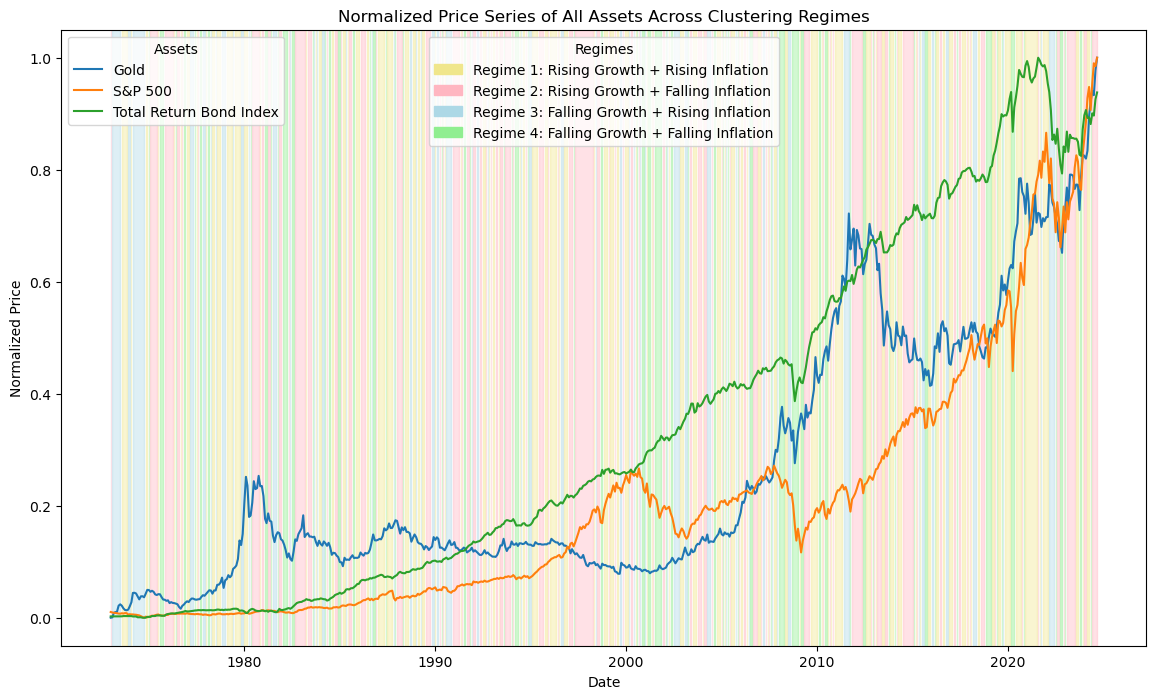

In [17]:
# Check and clean column names
print(input_data.columns)  # Display column names
input_data.columns = input_data.columns.str.strip()  # Remove leading/trailing spaces

if 'DateTime' not in input_data.columns:
    print("Error: Column 'DateTime' not found.")
else:
    # Ensure 'DateTime' is of datetime type
    input_data['DateTime'] = pd.to_datetime(input_data['DateTime'])
    input_data = input_data.set_index('DateTime')

# Ensure the index of aligned_output_data is in datetime format
aligned_output_data.index = pd.to_datetime(aligned_output_data.index)

# Remaining code
assets = ['Gold', 'S&P 500', 'Total Return Bond Index']

# Normalize the data for the specified assets
normalized_data = aligned_output_data[assets].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Add the 'Regime' column from input_data to normalized_data
normalized_data['Regime'] = input_data['Regime']

# Plot
plt.figure(figsize=(14, 8))
lines = []
for asset in assets:
    line, = plt.plot(normalized_data.index, normalized_data[asset], label=asset, linewidth=1.5)
    lines.append(line)

regime_colors = {1: '#f0e68c', 2: '#ffb6c1', 3: '#add8e6', 4: '#90ee90'}
regime_changes = normalized_data['Regime'].ne(normalized_data['Regime'].shift()).cumsum()
for (regime_segment, regime_data) in normalized_data.groupby([regime_changes, 'Regime']):
    start_date = regime_data.index[0]
    end_date = regime_data.index[-1]
    regime = regime_data['Regime'].iloc[0]
    color = regime_colors[int(regime)]
    plt.axvspan(start_date, end_date, color=color, alpha=0.4)

# Add legends and finalize plot
import matplotlib.patches as mpatches
asset_legend = plt.legend(handles=lines, loc='upper left', title="Assets")
patches = [
    mpatches.Patch(color='#f0e68c', label='Regime 1: Rising Growth + Rising Inflation'),
    mpatches.Patch(color='#ffb6c1', label='Regime 2: Rising Growth + Falling Inflation'),
    mpatches.Patch(color='#add8e6', label='Regime 3: Falling Growth + Rising Inflation'),
    mpatches.Patch(color='#90ee90', label='Regime 4: Falling Growth + Falling Inflation')
]
regime_legend = plt.legend(handles=patches, loc='upper center', title="Regimes")
plt.gca().add_artist(asset_legend)

plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Normalized Price Series of All Assets Across Clustering Regimes')
plt.show()

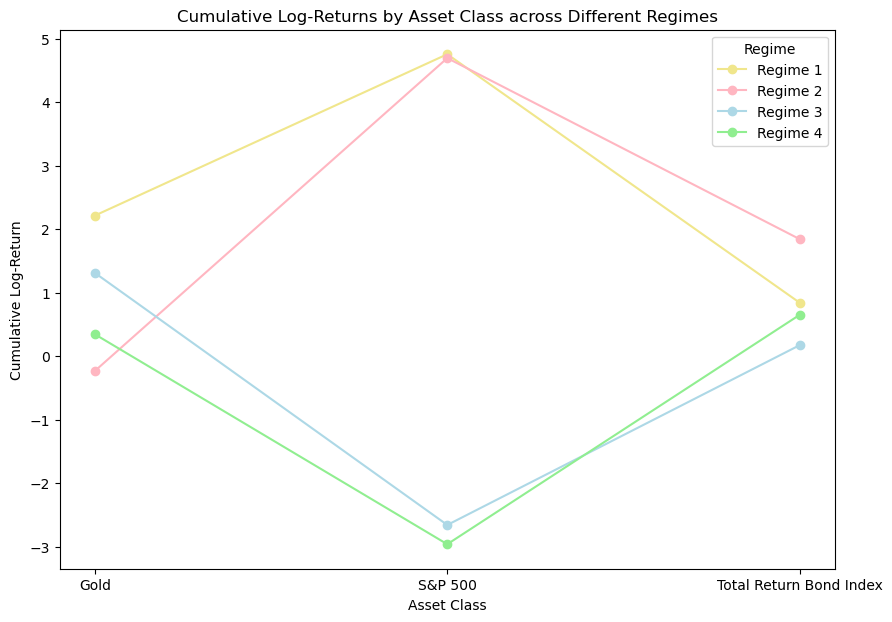

In [18]:
# List of columns to calculate log returns for
outputs = ['Gold', 'S&P 500', 'Total Return Bond Index']

# Calculate log returns for each output column
for output in outputs:
    log_return_col = f'{output}_log_return'
    aligned_output_data[log_return_col] = np.log(aligned_output_data[output] / aligned_output_data[output].shift(1))

# Drop rows with NaN values resulting from the shift operation
#aligned_output_data.dropna(subset=[f'{output}_log_return' for output in outputs], inplace=True)

# Ensure the Regime column is present
if 'Regime' not in aligned_output_data.columns:
    aligned_output_data['Regime'] = input_data['Regime'].values

# Calculate cumulative log returns grouped by Regime
output_log_return_cols = [f'{output}_log_return' for output in outputs]
cumulative_log_returns = aligned_output_data.groupby('Regime')[output_log_return_cols].sum()

# Define color mapping for regimes
regime_colors = {
    1: '#f0e68c',  # Yellow for Regime 1
    2: '#ffb6c1',  # Pink for Regime 2
    3: '#add8e6',  # Blue for Regime 3
    4: '#90ee90'   # Green for Regime 4
}

# Plot cumulative log returns by asset class for each regime
plt.figure(figsize=(10, 7))
for regime in cumulative_log_returns.index:
    plt.plot(
        outputs,
        cumulative_log_returns.loc[regime],
        marker='o',
        label=f'Regime {regime}',
        color=regime_colors[regime]  # Use colors corresponding to regimes
    )

# Final plot settings
plt.xlabel('Asset Class')
plt.ylabel('Cumulative Log-Return')
plt.title('Cumulative Log-Returns by Asset Class across Different Regimes')
plt.legend(title='Regime')
plt.show()

In [19]:
# Define a function to calculate the Sortino Ratio
def calculate_sortino_ratio(returns, risk_free_rate=0.02 / 12):
    annual_return = returns.mean() * 12  # Annualized return
    downside_returns = returns[returns < 0]  # Negative returns
    downside_deviation = downside_returns.std() * np.sqrt(12) if not downside_returns.empty else np.nan  # Downside deviation
    sortino_ratio = (annual_return - risk_free_rate * 12) / downside_deviation if downside_deviation != 0 else np.nan  # Sortino Ratio
    return sortino_ratio

# Define a function to calculate the maximum drawdown
def calculate_max_drawdown(returns):
    cumulative = (1 + returns).cumprod()  # Cumulative returns
    peak = cumulative.cummax()  # Rolling maximum
    drawdown = (cumulative - peak) / peak  # Drawdown ratio
    return drawdown.min()  # Maximum drawdown

In [20]:
# Average Return by Regime
average_return = aligned_output_data.groupby('Regime')[assets].mean().reset_index()
print("Average Return by Regime:")
print(average_return)

# Volatility by Regime
volatility = aligned_output_data.groupby('Regime')[assets].std().reset_index()
print("\nVolatility by Regime:")
print(volatility)

# Sharpe Ratio by Regime
sharpe_ratio = aligned_output_data.groupby('Regime')[assets].apply(
    lambda x: x.mean() / x.std() if x.std().all() != 0 else float('nan')
).reset_index()
print("\nSharpe Ratio by Regime:")
print(sharpe_ratio)

# Max Drawdown by Regime
max_drawdown = aligned_output_data.groupby('Regime')[assets].apply(
    lambda df: df.apply(lambda x: calculate_max_drawdown(x.pct_change().dropna()))
).reset_index()
print("\nMax Drawdown by Regime:")
print(max_drawdown)

Average Return by Regime:
   Regime        Gold      S&P 500  Total Return Bond Index
0       1  768.928781  1321.182683              1436.766927
1       2  724.450725  1174.386269              1257.452176
2       3  545.280557   886.643796               992.256296
3       4  710.224566  1134.865913              1297.616870

Volatility by Regime:
   Regime        Gold      S&P 500  Total Return Bond Index
0       1  578.494194  1281.213700              1148.704991
1       2  590.185459  1256.641751              1046.164344
2       3  485.894156  1040.035736               993.171048
3       4  540.217176  1107.912655              1039.793335

Sharpe Ratio by Regime:
   Regime      Gold   S&P 500  Total Return Bond Index
0       1  1.329190  1.031196                 1.250771
1       2  1.227497  0.934543                 1.201964
2       3  1.122221  0.852513                 0.999079
3       4  1.314702  1.024328                 1.247957

Max Drawdown by Regime:
   Regime      Gold   S&P 

In [21]:
from scipy.optimize import minimize
import pandas as pd
import numpy as np

# Define a function to optimize for maximum Sharpe ratio
def optimize_max_sharpe(ret, risk_free_rate=0.02 / 12):
    def sharpe_func(weights):
        hist_mean = ret.mean(axis=0)  # Historical mean
        hist_cov = ret.cov()  # Covariance matrix

        port_ret = np.dot(weights, hist_mean) * 12  # Annualized return
        port_std = np.sqrt(np.dot(weights, np.dot(hist_cov, weights)) * 12)  # Annualized volatility

        return -1 * (port_ret - risk_free_rate) / port_std  # Maximize Sharpe ratio

    def weight_cons(weights):
        return np.sum(weights) - 1

    bounds_lim = [(0, 1) for _ in range(len(ret.columns))]
    init = [1 / len(ret.columns) for _ in range(len(ret.columns))]
    constraint = {'type': 'eq', 'fun': weight_cons}

    optimal = minimize(fun=sharpe_func, x0=init, bounds=bounds_lim, constraints=constraint, method='SLSQP')
    return list(optimal.x)

# Define a function to optimize for minimum variance
def optimize_min_variance(ret):
    def find_port_variance(weights):
        cov = ret.cov()
        port_var = np.sqrt(np.dot(weights, np.dot(cov, weights))) * np.sqrt(12)  # Annualized volatility
        return port_var

    def weight_cons(weights):
        return np.sum(weights) - 1

    bounds_lim = [(0, 1) for _ in range(len(ret.columns))]
    init = [1 / len(ret.columns) for _ in range(len(ret.columns))]
    constraint = {'type': 'eq', 'fun': weight_cons}

    optimal = minimize(fun=find_port_variance, x0=init, bounds=bounds_lim, constraints=constraint, method='SLSQP')
    return list(optimal.x)

# Optimize portfolio by Regime
results = {}
for regime, group_data in aligned_output_data.groupby('Regime'):
    returns_data = group_data[['Gold', 'S&P 500', 'Total Return Bond Index']].pct_change().dropna()

    if returns_data.empty:
        continue  # Skip if the group data is empty

    if regime in [1, 4]:
        optimal_weights = optimize_max_sharpe(returns_data)
        objective = "Max Sharpe Ratio"
    else:
        optimal_weights = optimize_min_variance(returns_data)
        objective = "Min Variance"

    annual_return = returns_data.dot(optimal_weights).mean() * 12  # Annualized return
    annual_volatility = returns_data.dot(optimal_weights).std() * np.sqrt(12)  # Annualized volatility
    sharpe_ratio = (annual_return - 0.02) / annual_volatility  # Sharpe ratio

    results[regime] = {
        "Objective": objective,
        "Weights": optimal_weights,
        "Annual Return": annual_return,
        "Annual Volatility": annual_volatility,
        "Sharpe Ratio": sharpe_ratio,
    }

# Convert results to a DataFrame
final_results = pd.DataFrame.from_dict(results, orient="index")
final_results.index.name = "Regime"
final_results.reset_index(inplace=True)

# Print the results table
print("Portfolio Optimization by Regime:")
final_results

Portfolio Optimization by Regime:


,Regime,Objective,Weights,Annual Return,Annual Volatility,Sharpe Ratio
0,1,Max Sharpe Ratio,"[0.3033093160096107, 0.23021492023915618, 0.46...",0.228922,0.118224,1.767165
1,2,Min Variance,"[0.017503504637033342, 0.20051561503378162, 0....",0.242769,0.127939,1.741213
2,3,Min Variance,"[0.24522197787835623, 1.8973538018496328e-18, ...",0.445314,0.261155,1.628588
3,4,Max Sharpe Ratio,"[0.08704323784027111, 0.03462348126378542, 0.8...",0.400132,0.213050,1.784238


In [22]:
final_results['Weights'][0]

[0.3033093160096107, 0.23021492023915618, 0.4664757637512332]

In [23]:
final_results['Weights'][1]

[0.017503504637033342, 0.20051561503378162, 0.781980880329185]

In [24]:
final_results['Weights'][2]

[0.24522197787835623, 1.8973538018496328e-18, 0.7547780221216438]

In [25]:
final_results['Weights'][3]

[0.08704323784027111, 0.03462348126378542, 0.8783332808959435]

In [26]:
# Initialize the portfolio return column
aligned_output_data['Portfolio_Return'] = np.nan

for regime, group_data in aligned_output_data.groupby('Regime'):
    # Calculate returns
    returns_data = group_data[['Gold', 'S&P 500', 'Total Return Bond Index']].pct_change().dropna()

    if returns_data.empty:
        continue  # Skip empty groups

    # Determine optimization objective based on Regime
    if regime in [1, 4]:  # Maximize Sharpe Ratio
        weights = optimize_max_sharpe(returns_data)
    else:  # Minimize Variance
        weights = optimize_min_variance(returns_data)

    # Validate weights
    assert np.isclose(np.sum(weights), 1.0), f"Regime {regime}: Weights do not sum to 1"
    assert all(0 <= w <= 1 for w in weights), f"Regime {regime}: Invalid weight values"

    # Calculate portfolio returns using optimized weights
    portfolio_return = returns_data.dot(weights)
    aligned_output_data.loc[portfolio_return.index, 'Portfolio_Return'] = portfolio_return

# Drop rows with NaN values in 'Portfolio_Return'
aligned_output_data = aligned_output_data.dropna(subset=['Portfolio_Return'])

# Calculate the overall performance of the dynamic optimization strategy
total_portfolio_return = aligned_output_data['Portfolio_Return']

# Compute overall performance metrics
risk_free_rate = 0.02 / 12
annual_return = total_portfolio_return.mean() * 12  # Annualized return
annual_volatility = total_portfolio_return.std() * np.sqrt(12)  # Annualized volatility
sharpe_ratio = (annual_return - 0.02) / annual_volatility  # Sharpe Ratio
sortino_ratio = calculate_sortino_ratio(total_portfolio_return)  # Sortino Ratio
max_drawdown = calculate_max_drawdown(total_portfolio_return)  # Maximum drawdown

# Print the overall results of the dynamic optimization strategy
print("Dynamic Optimization Strategy Results (Overall):")
print(f"Annual Return: {annual_return:.2%}")
print(f"Annual Volatility: {annual_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")

Dynamic Optimization Strategy Results (Overall):
Annual Return: 30.24%
Annual Volatility: 17.44%
Sharpe Ratio: 1.62
Sortino Ratio: 3.82
Max Drawdown: -35.35%


In [27]:
# Calculate the return for S&P 500
benchmark_return = aligned_output_data['S&P 500'].pct_change().dropna()

# Dynamic strategy portfolio returns
dynamic_portfolio_return = aligned_output_data['Portfolio_Return'].dropna()

# Annualized excess return
annual_excess_return = (dynamic_portfolio_return.mean() - benchmark_return.mean()) * 12

# Annualized tracking error
tracking_error = (dynamic_portfolio_return - benchmark_return).std() * np.sqrt(12)

# Information Ratio
information_ratio = annual_excess_return / tracking_error if tracking_error != 0 else np.nan

# Benchmark-related metrics
annual_return_benchmark = benchmark_return.mean() * 12  # Annualized return
annual_volatility_benchmark = benchmark_return.std() * np.sqrt(12)  # Annualized volatility
sharpe_ratio_benchmark = (annual_return_benchmark - 0.02) / annual_volatility_benchmark  # Sharpe Ratio
sortino_ratio_benchmark = calculate_sortino_ratio(benchmark_return)  # Sortino Ratio
max_drawdown_benchmark = calculate_max_drawdown(benchmark_return)  # Maximum drawdown

# Output results
print("Dynamic Portfolio vs. S&P 500 Benchmark:")
print(f"Annual Excess Return: {annual_excess_return:.2%}")
print(f"Tracking Error: {tracking_error:.2%}")
print(f"Information Ratio: {information_ratio:.2f}")
print("\nS&P 500 Benchmark Performance:")
print(f"Annual Return: {annual_return_benchmark:.2%}")
print(f"Annual Volatility: {annual_volatility_benchmark:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_benchmark:.2f}")
print(f"Sortino Ratio: {sortino_ratio_benchmark:.2f}")
print(f"Max Drawdown: {max_drawdown_benchmark:.2%}")

Dynamic Portfolio vs. S&P 500 Benchmark:
Annual Excess Return: 21.33%
Tracking Error: 23.60%
Information Ratio: 0.90

S&P 500 Benchmark Performance:
Annual Return: 8.91%
Annual Volatility: 15.88%
Sharpe Ratio: 0.44
Sortino Ratio: 0.59
Max Drawdown: -54.70%


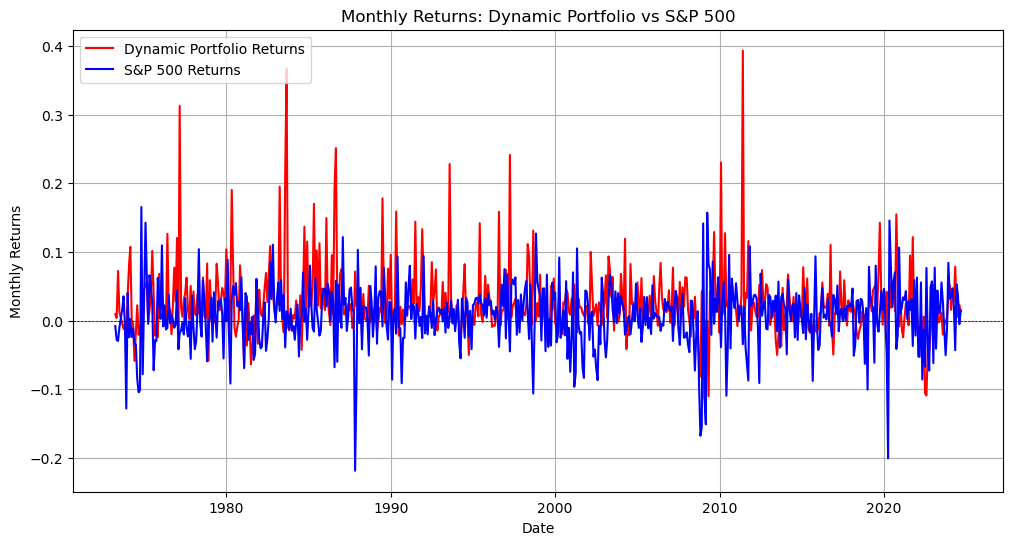

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dynamic returns
dynamic_returns = []

# Calculate returns by grouping by Regime
for regime, group_data in aligned_output_data.groupby('Regime'):
    # Extract returns
    returns_data = group_data[['Gold', 'S&P 500', 'Total Return Bond Index']].pct_change().dropna()

    # Apply optimization strategy based on Regime
    if regime in [1, 4]:  # Maximize Sharpe Ratio
        weights = optimize_max_sharpe(returns_data)
    else:  # Minimize Variance
        weights = optimize_min_variance(returns_data)

    # Validate weights
    assert np.isclose(np.sum(weights), 1.0), f"Regime {regime}: Weights do not sum to 1"
    assert all(0 <= w <= 1 for w in weights), f"Regime {regime}: Invalid weight values"

    # Calculate returns for the Regime
    regime_returns = returns_data.dot(weights)
    regime_returns.index = group_data.index[1:]  # Adjust index
    dynamic_returns.append(regime_returns)

# Combine and sort dynamic portfolio returns
dynamic_returns = pd.concat(dynamic_returns).sort_index()

# Benchmark returns
benchmark_returns = aligned_output_data['S&P 500'].pct_change().dropna()

# Visualization
plt.figure(figsize=(12, 6))

# Plot dynamic portfolio monthly returns
plt.plot(dynamic_returns.index, dynamic_returns, label='Dynamic Portfolio Returns', linewidth=1.5, color='red')

# Plot benchmark monthly returns
plt.plot(benchmark_returns.index, benchmark_returns, label='S&P 500 Returns', linewidth=1.5, color='blue')

# Chart settings
plt.title("Monthly Returns: Dynamic Portfolio vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Monthly Returns")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add zero axis line
plt.legend(loc='upper left')
plt.grid(True)

# Show chart
plt.show()

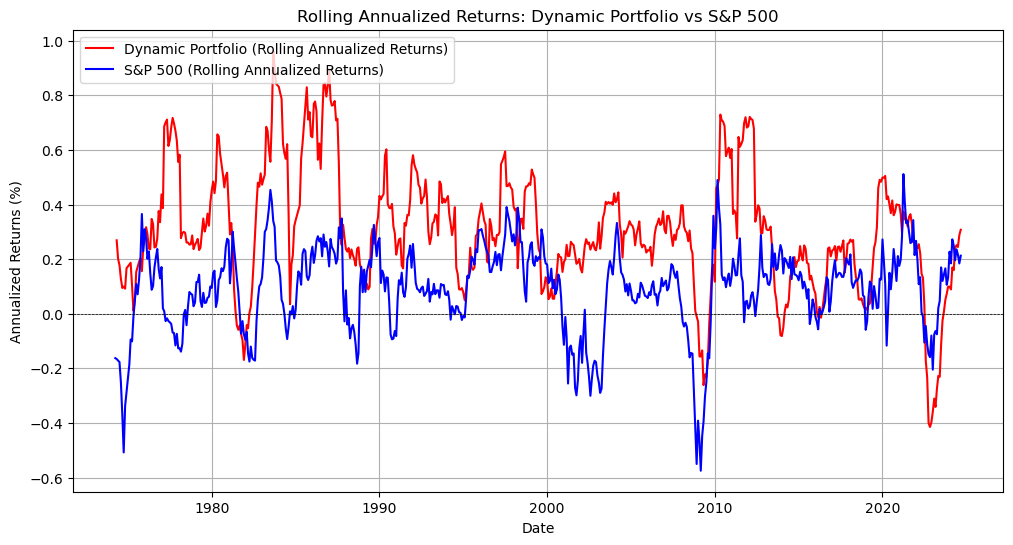

In [31]:
# Define rolling window size (e.g., 12 months, representing 1 year)
rolling_window = 12

# Calculate rolling annualized returns
portfolio_rolling_returns = dynamic_returns.rolling(rolling_window).mean() * 12
benchmark_rolling_returns = benchmark_returns.rolling(rolling_window).mean() * 12

# Visualize rolling annualized returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_rolling_returns.index, portfolio_rolling_returns, label='Dynamic Portfolio (Rolling Annualized Returns)', linewidth=1.5, color='red')
plt.plot(benchmark_rolling_returns.index, benchmark_rolling_returns, label='S&P 500 (Rolling Annualized Returns)', linewidth=1.5, color='blue')

# Chart settings
plt.title("Rolling Annualized Returns: Dynamic Portfolio vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Annualized Returns (%)")
plt.legend(loc='upper left')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Zero axis line
plt.grid(True)

# Show chart
plt.show()

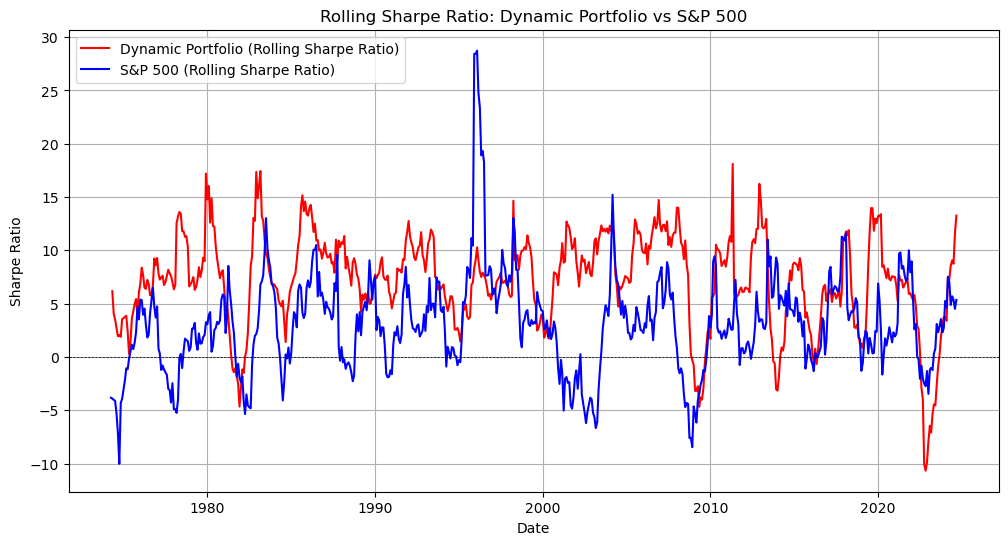

In [32]:
# Risk-free rate
risk_free_rate = 0.02 / 12

# Calculate rolling Sharpe Ratio
portfolio_rolling_sharpe = (portfolio_rolling_returns - risk_free_rate) / dynamic_returns.rolling(rolling_window).std()
benchmark_rolling_sharpe = (benchmark_rolling_returns - risk_free_rate) / benchmark_returns.rolling(rolling_window).std()

# Visualize rolling Sharpe Ratio
plt.figure(figsize=(12, 6))
plt.plot(portfolio_rolling_sharpe.index, portfolio_rolling_sharpe, label='Dynamic Portfolio (Rolling Sharpe Ratio)', linewidth=1.5, color='red')
plt.plot(benchmark_rolling_sharpe.index, benchmark_rolling_sharpe, label='S&P 500 (Rolling Sharpe Ratio)', linewidth=1.5, color='blue')

# Chart settings
plt.title("Rolling Sharpe Ratio: Dynamic Portfolio vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend(loc='upper left')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Zero axis line
plt.grid(True)

# Show chart
plt.show()

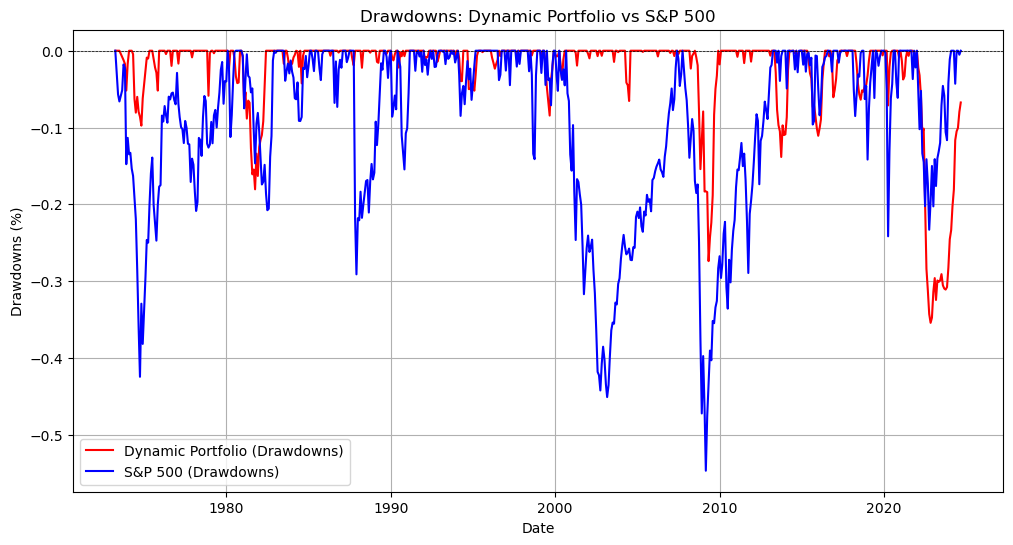

In [33]:
# Calculate maximum drawdowns
def calculate_drawdowns(cumulative_returns):
    rolling_max = cumulative_returns.cummax()  # Rolling maximum value
    drawdowns = (cumulative_returns / rolling_max) - 1  # Drawdown calculation
    return drawdowns

portfolio_drawdowns = calculate_drawdowns((1 + dynamic_returns).cumprod())  # Portfolio drawdowns
benchmark_drawdowns = calculate_drawdowns((1 + benchmark_returns).cumprod())  # Benchmark drawdowns

# Visualize maximum drawdowns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_drawdowns.index, portfolio_drawdowns, label='Dynamic Portfolio (Drawdowns)', linewidth=1.5, color='red')
plt.plot(benchmark_drawdowns.index, benchmark_drawdowns, label='S&P 500 (Drawdowns)', linewidth=1.5, color='blue')

# Chart settings
plt.title("Drawdowns: Dynamic Portfolio vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Drawdowns (%)")
plt.legend(loc='lower left')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Zero axis line
plt.grid(True)

# Show chart
plt.show()